# Predicción de Calidad del Vino (Core)

## Objetivo

Utilizar técnicas de clasificación aprendidas hasta el momento para predecir la calidad del vino basándose en características físico-químicas. Este ejercicio permitirá aplicar conceptos como la selección de características, preprocesamiento de datos, entrenamiento y evaluación de modelos de clasificación, y análisis de resultados mediante métricas y visualizaciones.

<b>Dataset:</b> [Wine Quality Dataset](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset)

<b>Descripción del Dataset:</b> Este conjunto de datos contiene información sobre distintas características físico-químicas de muestras de vino tinto y su calidad asociada. Las características incluyen acidez fija, acidez volátil, ácido cítrico, azúcar residual, cloruros, dióxido de azufre libre, dióxido de azufre total, densidad, pH, sulfatos y alcohol. La calidad del vino está clasificada en una escala del 0 al 10.

## Instrucciones:

### 1. Carga y Exploración de Datos:

* Cargar el dataset y revisar su estructura básica.
* Describir las variables y su distribución.
* Identificar y tratar valores nulos y outliers.

###  2. Preprocesamiento de Datos:

* Seleccionar características importantes para la clasificación.
* Transformar variables categóricas en variables numéricas si es necesario.
* Dividir los datos en conjuntos de entrenamiento y prueba.
* Escalar las características.

### 3. Entrenamiento de Modelos de Clasificación:

* Entrenar al menos tres modelos de clasificación diferentes (por ejemplo, KNN, RandomForest, y Regresión Logística).
* Utilizar validación cruzada para seleccionar los mejores hiperparámetros.

### 4. Evaluación de Modelos:

* Evaluar los modelos utilizando métricas como exactitud, precisión, recall, F1-Score y matriz de confusión.
* Generar un informe de clasificación para cada modelo.
* Crear y visualizar la curva ROC y calcular el AUC para el mejor modelo.

### 5. Análisis y Comparación de Resultados:

* Comparar el rendimiento de los diferentes modelos.
* Discutir cuál modelo ofrece el mejor rendimiento y por qué.
* Identificar las fortalezas y debilidades de cada enfoque en este contexto.

### 6. Repositorio en GitHub:

* Crear un repositorio en GitHub con el código y los resultados del análisis.
* Crear un tag de liberación con una breve descripción de la versión final del proyecto.

### Adicional:

* Añadir un archivo README.md en el repositorio de GitHub que explique el propósito del proyecto, las técnicas utilizadas y cómo ejecutar el código.
* Incluir una presentación o informe detallado en formato PDF con todos los hallazgos y conclusiones del análisis.

<b>Nota:</b> Asegúrate de documentar cada paso del proceso, incluyendo la justificación de las decisiones tomadas durante el preprocesamiento, la selección de modelos y la evaluación de los resultados. Esto proporcionará una visión completa y estructurada del trabajo realizado.

# Resolución

## 1. Carga y Exploración de Datos:

### Cargar el dataset y revisar su estructura básica.

Primero, descargamos el dataset de Kaggle.

In [1]:
from git_utils import get_repo_file_path
from kaggle_utils import descargar_dataset_kaggle


# Asegúrarse de que el archivo kaggle.json con las credenciales de kaggle
# estén en el directorio base del repositorio.
kaggle_credentials_path = get_repo_file_path("kaggle.json")

descargar_dataset_kaggle(
    "https://www.kaggle.com/datasets/yasserh/wine-quality-dataset",
    kaggle_credentials_path,
    "../data/",
)

Skipping, found downloaded files in "../data/wine-quality-dataset" (use force=True to force download)


Luego, cargamos este dataset en un dataframe.

In [2]:
import pandas as pd

camino_ds = "../data/wine-quality-dataset/WineQT.csv"
df = pd.read_csv(camino_ds, delimiter=",")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


Al parecer, todos los tipos de datos son correctos. No se visualizan columnas categóricas en el dataframe.

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Verificamos los valores únicos en quality, que es la variable a ser predicta.

In [4]:
df["quality"].unique().tolist()

[5, 6, 7, 4, 8, 3]

Según la descripción del dataset, esta columna va de 0 a 10, por lo que los valores vistos son correctos.

Verificamos la columna Id

In [5]:
if len(df["Id"].unique().tolist()) < df.shape[0]:
    print("Hay un id con más de 1 valor en el dataframe")
else:
    print("Todos los Ids en el dataframe son únicos")

Todos los Ids en el dataframe son únicos


Al ser todos los Ids únicos, posiblemente esta columna no sea necesaria agregarla a los modelos de predicción.

### Describir las variables y su distribución.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [7]:
from eda_utils import obtener_estadisticas_descriptivas_df_es

obtener_estadisticas_descriptivas_df_es(df).T

,Cantidad,Mínimo,Máximo,Promedio,Desviación Estándar,Mediana,Coeficiente de Variación
fixed acidity,1143.0,4.60000,15.90000,8.311111,1.747595,7.90000,0.210272
volatile acidity,1143.0,0.12000,1.58000,0.531339,0.179633,0.52000,0.338077
citric acid,1143.0,0.00000,1.00000,0.268364,0.196686,0.25000,0.732907
residual sugar,1143.0,0.90000,15.50000,2.532152,1.355917,2.20000,0.535480
chlorides,1143.0,0.01200,0.61100,0.086933,0.047267,0.07900,0.543724
free sulfur dioxide,1143.0,1.00000,68.00000,15.615486,10.250486,13.00000,0.656431
total sulfur dioxide,1143.0,6.00000,289.00000,45.914698,32.782130,37.00000,0.713979
density,1143.0,0.99007,1.00369,0.996730,0.001925,0.99668,0.001931
pH,1143.0,2.74000,4.01000,3.311015,0.156664,3.31000,0.047316
sulphates,1143.0,0.33000,2.00000,0.657708,0.170399,0.62000,0.259080


### Identificar y tratar valores nulos y outliers.

#### Valores nulos:

In [8]:
from eda_utils import obtener_estadisticas_datos_nulos

obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
fixed acidity,1143,0,0.0
volatile acidity,1143,0,0.0
citric acid,1143,0,0.0
residual sugar,1143,0,0.0
chlorides,1143,0,0.0
free sulfur dioxide,1143,0,0.0
total sulfur dioxide,1143,0,0.0
density,1143,0,0.0
pH,1143,0,0.0
sulphates,1143,0,0.0


Al parecer, no existe ningún valor nulo en este dataset. Por lo que no será necesario hacer nada.

#### Duplicados:

In [9]:
duplicados = df.duplicated()

cant_registros_duplicados = duplicados.sum()

print(f"Cant. de Registros Duplicados general: {cant_registros_duplicados}")

del duplicados
del cant_registros_duplicados

Cant. de Registros Duplicados general: 0


No se observan duplicados en el dataframe.

#### Outliers:

In [10]:
from eda_utils import obtener_datos_outliers_df

obtener_datos_outliers_df(df).T

,Nro. Outliers,Porc. Outliers,Límite mínimo,Límite máximo
fixed acidity,44.0,3.849519,4.100000,12.100000
volatile acidity,14.0,1.224847,0.021250,1.011250
citric acid,1.0,0.087489,-0.405000,0.915000
residual sugar,110.0,9.623797,0.850000,3.650000
chlorides,77.0,6.736658,0.040000,0.120000
free sulfur dioxide,18.0,1.574803,-14.000000,42.000000
total sulfur dioxide,40.0,3.499563,-39.000000,121.000000
density,36.0,3.149606,0.992157,1.001257
pH,20.0,1.749781,2.912500,3.692500
sulphates,43.0,3.762030,0.280000,1.000000


Existen outliers en el dataset. Los porcentajes no son muy altos. Se analizarán mejor en las visualizaciones.

### EDA

#### Visualizaciones univariadas

##### Histogramas

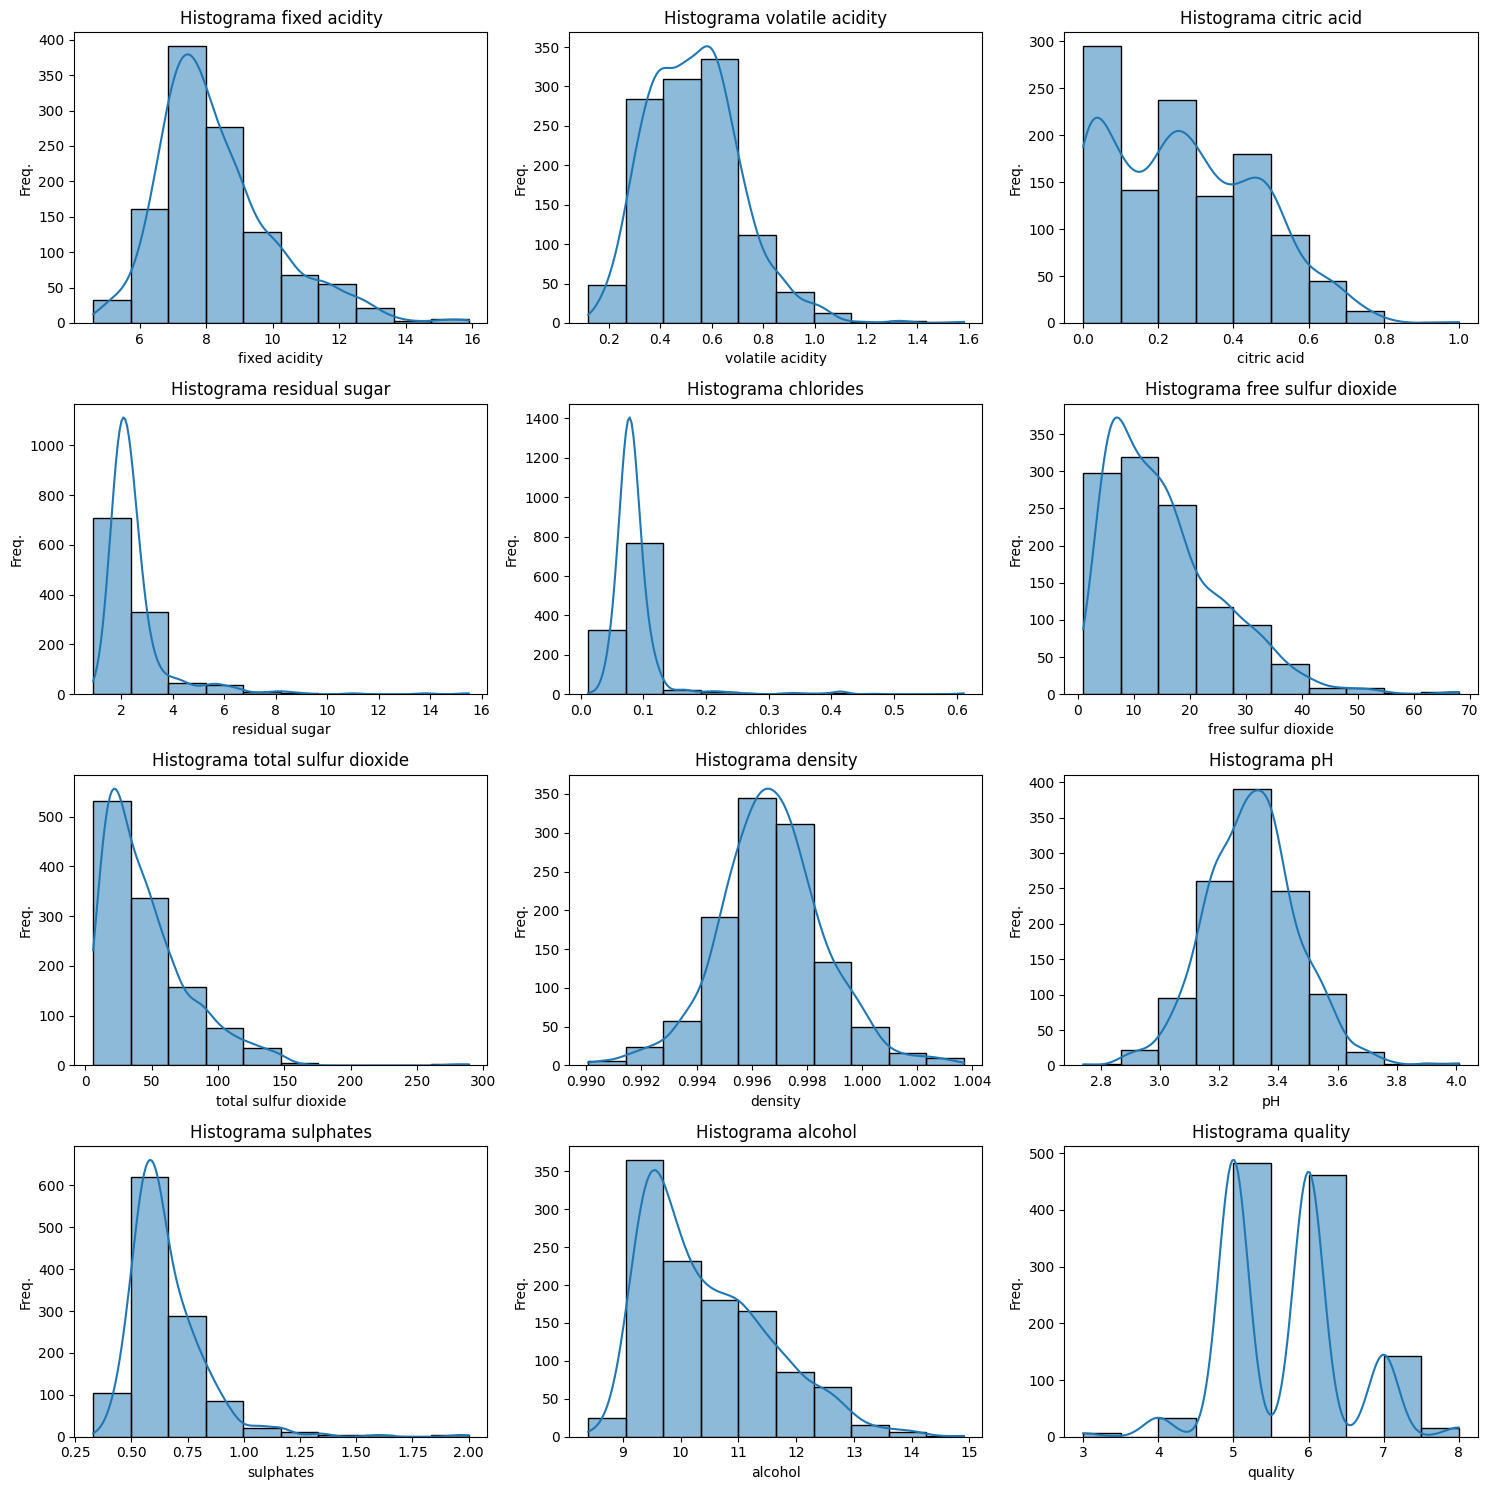

In [11]:
from eda_utils import obtener_columnas_numericas_df, graficar_histogramas


columnas_numericas = obtener_columnas_numericas_df(df)

# No es necesario visualizar la id ya que es solo un identificador
# únicio por fila.
columnas_numericas.remove("Id")

graficar_histogramas(df, columnas_numericas, bins=10, kde=True, figsize=(15, 15))

##### Boxplots

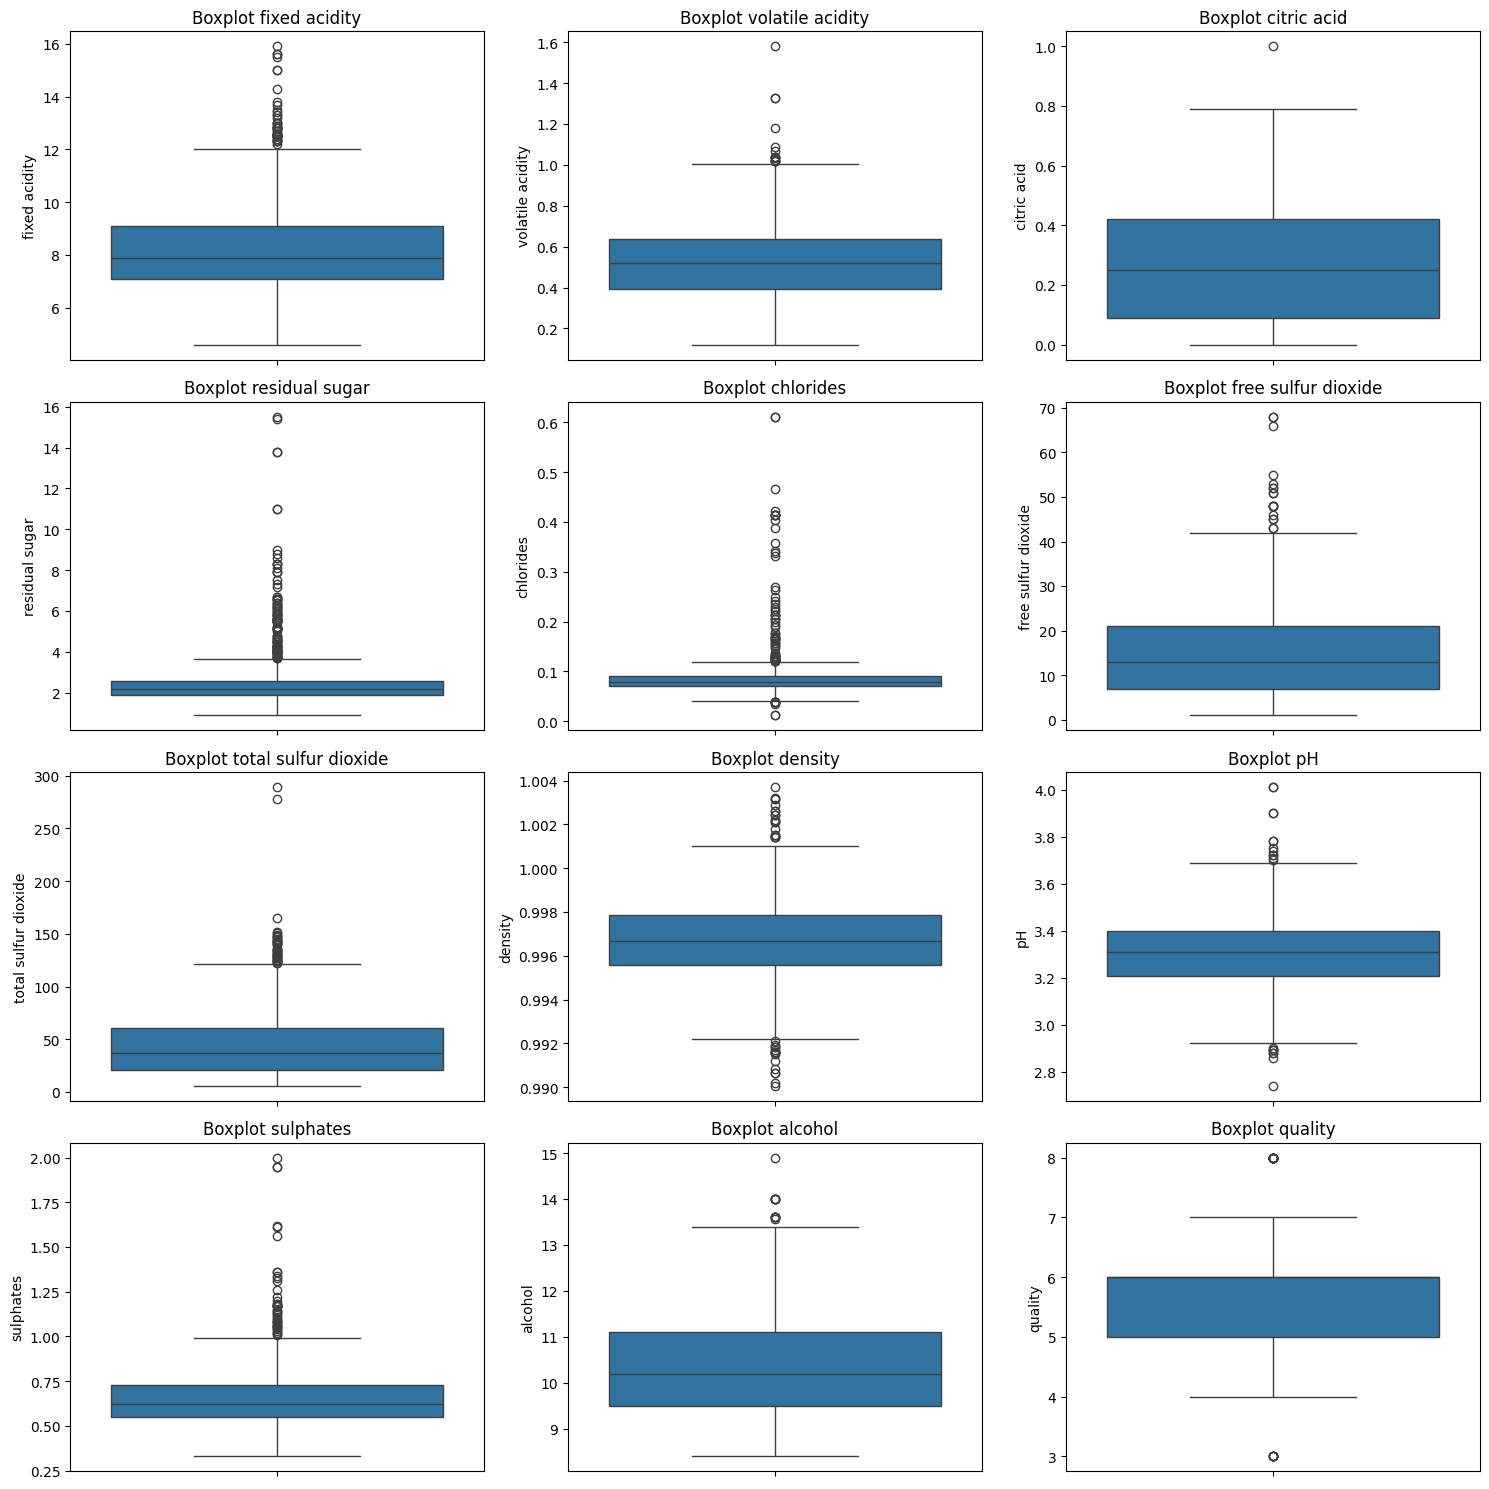

In [12]:
from eda_utils import graficar_boxplots


graficar_boxplots(df, columnas_numericas, figsize=(15, 15))

De los histogramas y boxplots, notamos que existen columnas que posiblemente tengan una distribución normal, mientras que otros no. Probamos con los métodos de shapiro y D'Agostino K-squared test.

In [13]:
from statistic_utils import realizar_prueba_shapiro


realizar_prueba_shapiro(df, columnas_numericas)

Columna fixed acidity: stat=0.9367099450383597 p=1.2391335125507748e-21 distribucion='No normal'
Columna volatile acidity: stat=0.974213537405471 p=2.128643131913295e-13 distribucion='No normal'
Columna citric acid: stat=0.9532223252937296 p=1.2738935267172452e-18 distribucion='No normal'
Columna residual sugar: stat=0.5872921892338804 p=9.187529789128732e-46 distribucion='No normal'
Columna chlorides: stat=0.4692745111675586 p=1.0254506233493889e-49 distribucion='No normal'
Columna free sulfur dioxide: stat=0.9023087372397234 p=2.2002454215086998e-26 distribucion='No normal'
Columna total sulfur dioxide: stat=0.8632610217502209 p=2.0735657529338715e-30 distribucion='No normal'
Columna density: stat=0.9906966717226942 p=1.2459268615435194e-06 distribucion='No normal'
Columna pH: stat=0.9921162007107959 p=8.67292819515674e-06 distribucion='No normal'
Columna sulphates: stat=0.8240777664041237 p=1.2650341110934094e-33 distribucion='No normal'
Columna alcohol: stat=0.9289470480773449 p=7.

In [14]:
from statistic_utils import realizar_prueba_d_agostino


realizar_prueba_d_agostino(df, columnas_numericas)

Columna fixed acidity: stat=182.74633288718823 p=2.0755730332665263e-40 distribucion='No normal'
Columna volatile acidity: stat=110.0654289871664 p=1.2577541856538271e-24 distribucion='No normal'
Columna citric acid: stat=87.97087069318528 p=7.89529105912441e-20 distribucion='No normal'
Columna residual sugar: stat=1068.7882569291467 p=8.233393009354618e-233 distribucion='No normal'
Columna chlorides: stat=1341.8699066427403 p=4.136681237450537e-292 distribucion='No normal'
Columna free sulfur dioxide: stat=239.52492155433637 p=9.723534183543945e-53 distribucion='No normal'
Columna total sulfur dioxide: stat=410.9501276204486 p=5.798472722906463e-90 distribucion='No normal'
Columna density: stat=21.88158500337791 p=1.772042725381413e-05 distribucion='No normal'
Columna pH: stat=30.27193701732856 p=2.670129951746963e-07 distribucion='No normal'
Columna sulphates: stat=670.1879021910112 p=2.9549226709283562e-146 distribucion='No normal'
Columna alcohol: stat=111.56735159965109 p=5.935501

Según las pruebas de shapiro y D'Agostino, las columnas no siguen una distribución normal. Adicionalmente, se puede notar en los gráficos una gran cantidad de outliers, por lo que se opta para más adelante usar el escalador RobustScaler, que es un escalador robusto ante outliers.

#### Visualizaciones multivariadas

Realizamos gráficos de dispersión de todas las columnas vs quality para buscar correlaciones.

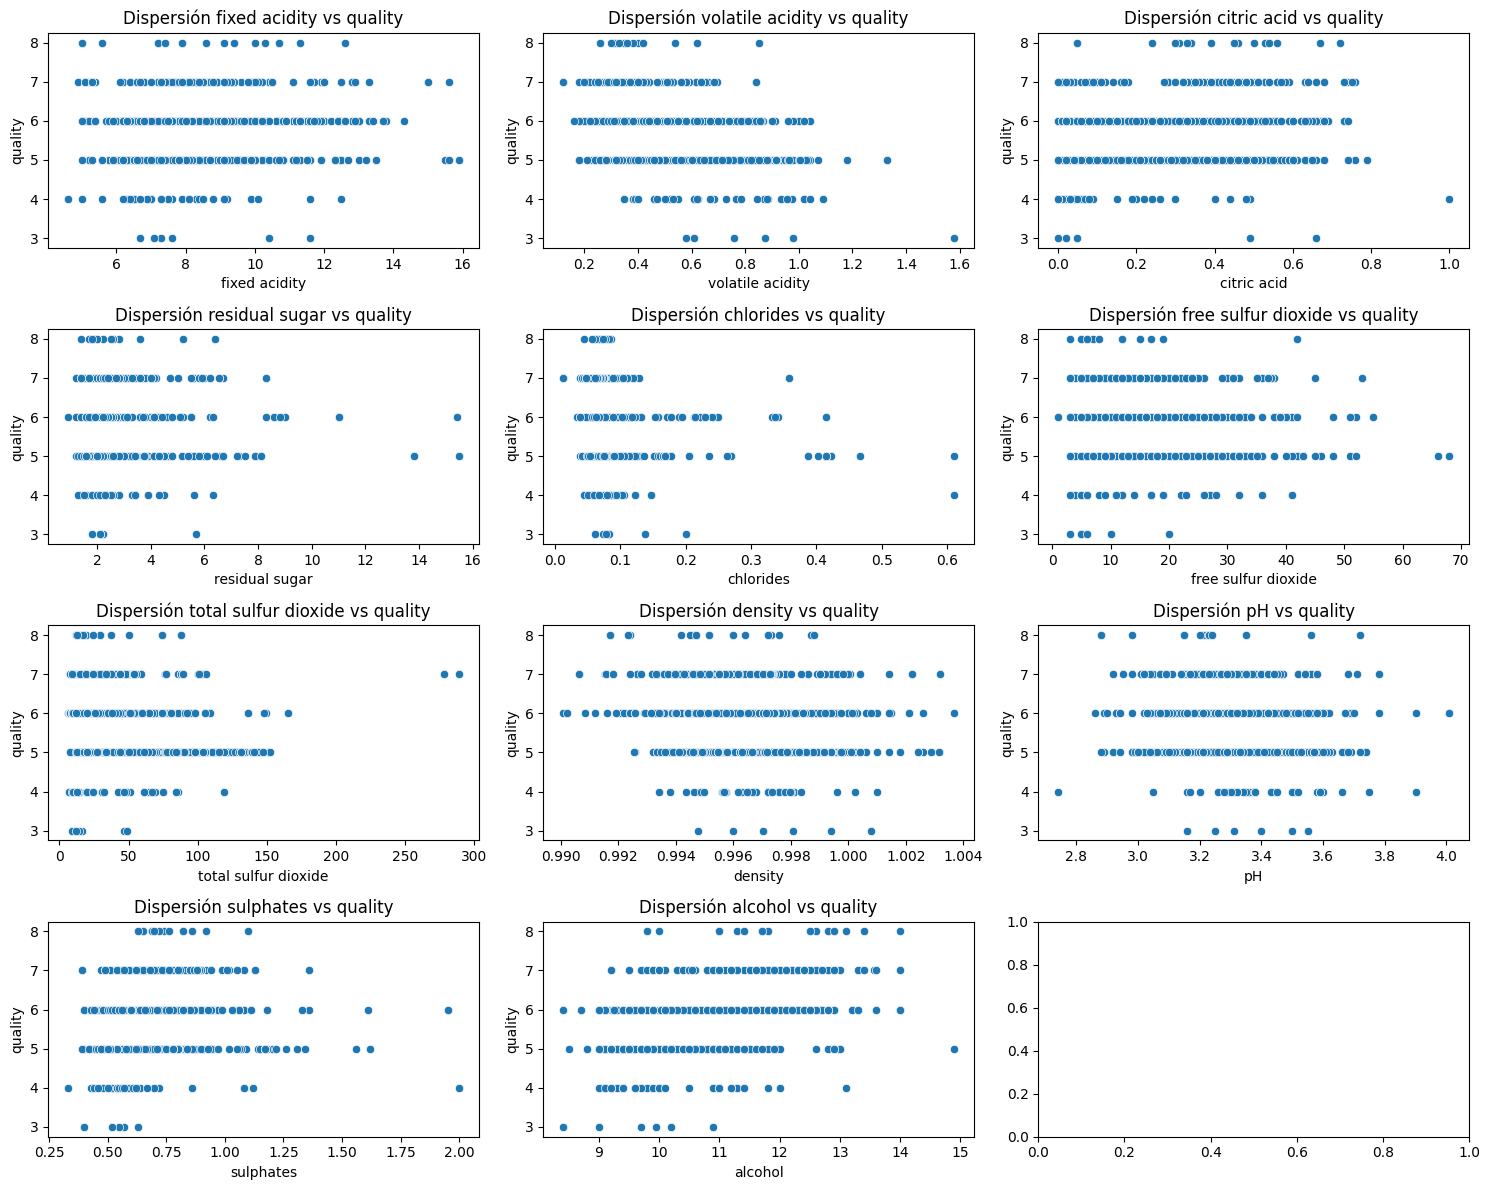

In [15]:
from eda_utils import graficar_dispersiones


columnas_x = [*columnas_numericas]
columnas_x.remove("quality")


graficar_dispersiones(df, columnas_x, "quality", figsize=(15, 12))

Al parecer, los gráficos de dispersión no son muy apropiados, siendo probablemente mejor un gráfico de barras.

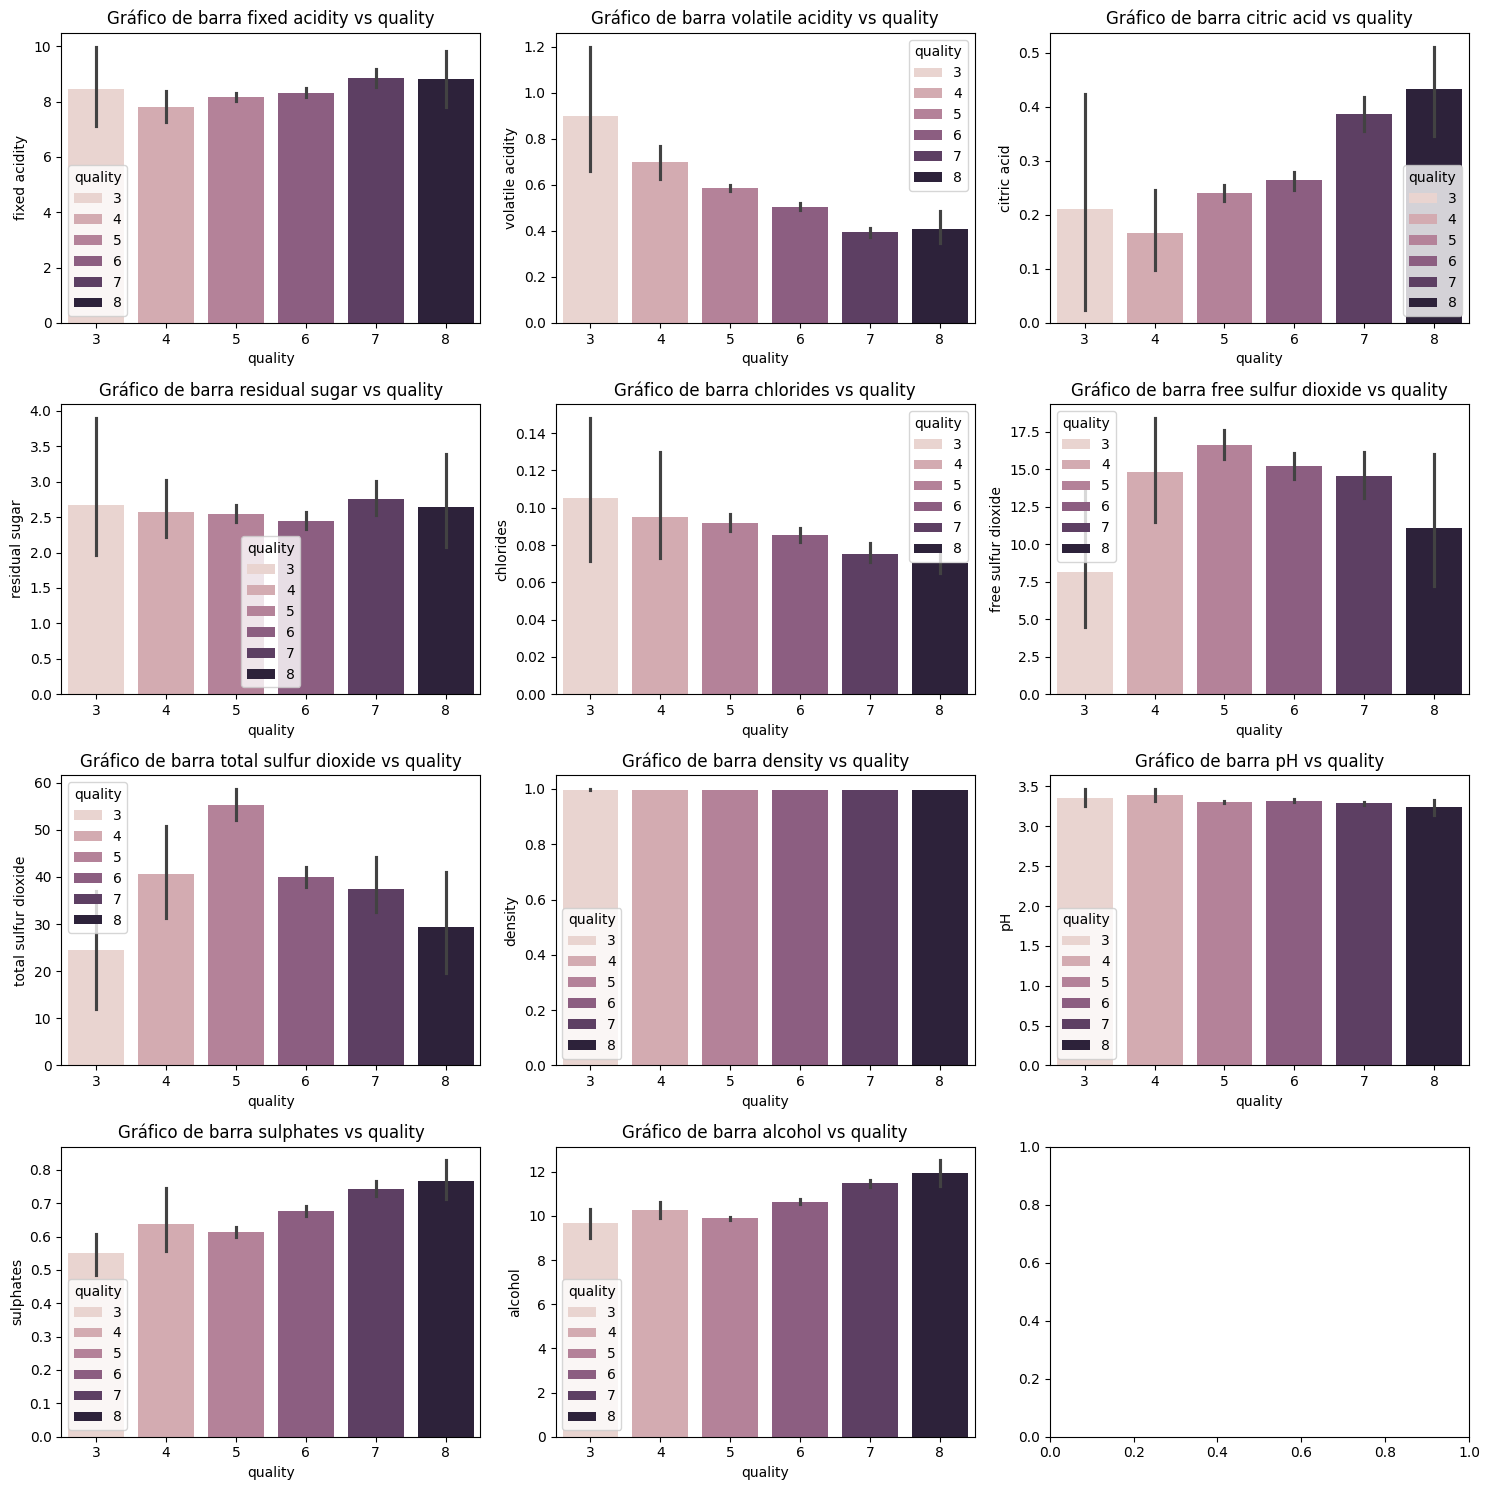

In [16]:
from eda_utils import graficar_barras


graficar_barras(df, columnas_x, "quality", figsize=(15, 15))

De los gráficos, se puede notar que diferentes parámetros, como volatile acidity y citric acid, influyen levemente en la calidad del vino. No obstante, hay otros parámetros como la densidad y el pH, en la que no se ve que el parámetro influya demasiado en la calidad. 

Graficamos un heatmap de correlación para investigar mejor.

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.250728     0.673157   
volatile acidity          -0.250728          1.000000    -0.544187   
citric acid                0.673157         -0.544187     1.000000   
residual sugar             0.171831         -0.005751     0.175815   
chlorides                  0.107889          0.056336     0.245312   
free sulfur dioxide       -0.164831         -0.001962    -0.057589   
total sulfur dioxide      -0.110628          0.077748     0.036871   
density                    0.681501          0.016512     0.375243   
pH                        -0.685163          0.221492    -0.546339   
sulphates                  0.174592         -0.276079     0.331232   
alcohol                   -0.075055         -0.203909     0.106250   
quality                    0.121970         -0.407394     0.240821   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

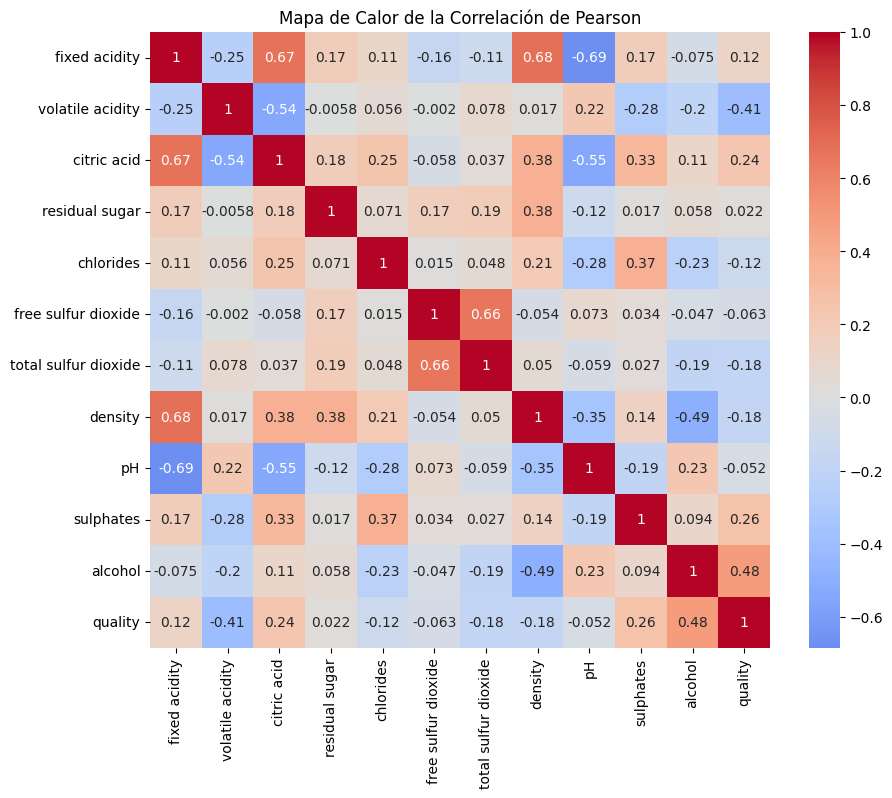

In [17]:
from eda_utils import graficar_mapa_correlacion


graficar_mapa_correlacion(df, columnas_numericas)

De este gráfico de correlaciones podemos destacar las siguientes columnas:

* volatile acidity
* alcohol

No obstante, las correlaciones en estas columnas contra calidad no son muy fuertes.

## 2. Preprocesamiento de Datos:

### Seleccionar características importantes para la clasificación.

Como todas las columnas son numéricas, se elegirán como columnas de entrada todas menos Id y quality, y la columna de salida será quality.

In [18]:
columnas_numericas = obtener_columnas_numericas_df(df)

columnas_numericas

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'Id']

In [19]:
from eda_utils import obtener_columnas_categoricas_df

columnas_categoricas = obtener_columnas_categoricas_df(df)

columnas_categoricas

[]

In [20]:
columnas_numericas_prediccion = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol',
    # 'quality',
    # 'Id',
]

campo_salida = "quality"


X = df[[*columnas_numericas_prediccion]]
y = df[campo_salida]

### Transformar variables categóricas en variables numéricas si es necesario.

No será necesario ya que no existen variables categóricas.

Dividir los datos en conjuntos de entrenamiento y prueba.

In [21]:
from sklearn.model_selection import train_test_split

# Dividimos el dataset en 70% para entrenamiento y 30% para testeo.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

### Escalar las características.

Para escalar las características, se utilizará el método RobustScaler, ya que se detectó una gran cantidad de outliers en gráficos previos.

In [22]:
from sklearn.preprocessing import RobustScaler


scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 3. Entrenamiento de Modelos de Clasificación:

### Entrenar al menos tres modelos de clasificación diferentes (por ejemplo, KNN, RandomForest, y Regresión Logística).

#### KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Probar diferentes valores de K
k_values = list(range(1, 21))
mse_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    mse_scores.append(scores.mean())

# Seleccionar el K con el menor MSE
best_k = k_values[mse_scores.index(max(mse_scores))]
print(f'Mejor valor de K: {best_k}')

/home/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/home/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/home/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/home/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/home/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.9/site-packages/sklearn/model_selection/_split.

Mejor valor de K: 20


In [24]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
)


# Entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=20)

#### Random Forests

Buscamos los mejores parametros con GridSearchCV

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


rf = RandomForestClassifier()

param_grid = { 
    'n_estimators': list(range(0, 50)),
    'max_depth': list(range(1, 10)),
    'random_state': [0,]
}


CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2)
CV_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
[CV] END ........max_depth=1, n_estimators=0, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=0, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=0, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=0, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=0, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=1, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=1, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=1, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=1, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=1, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=2, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=2,

/home/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[CV] END ........max_depth=1, n_estimators=4, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=4, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=5, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=5, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=5, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=5, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=5, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=6, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=6, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=6, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=6, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=6, random_state=0; total time=   0.0s
[CV] END ........max_depth=1

/home/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
45 fits failed out of a total of 2250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/home/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.9/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.9/site-packages/sklearn/base.

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...],
                         'random_state': [0]},
             verbose=2)

In [27]:
params = CV_rfc.best_params_

params

{'max_depth': 8, 'n_estimators': 16, 'random_state': 0}

In [28]:
CV_rfc.best_score_

np.float64(0.6325000000000001)

In [29]:
rf_params_cv = RandomForestClassifier(**params)

rf_params_cv.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=16, random_state=0)

#### Regresión Logística

In [30]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de Regresión Logística con hiperparámetros específicos
lr = LogisticRegression(
    penalty='l2',           # Tipo de regularización L2 (Ridge)
    C=1.0,                   # Inverso de la fuerza de regularización
    solver='lbfgs',          # Algoritmo para la optimización
    max_iter=100,            # Número máximo de iteraciones
    tol=1e-4,                # Tolerancia para el criterio de parada
    random_state=42 # Semilla para la reproducibilidad
)         

# Entrenar el modelo
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

### Utilizar validación cruzada para seleccionar los mejores hiperparámetros.

Se realizó en el modelo de Random Forests

## 4. Evaluación de Modelos:

#### KNN

In [40]:
# Realizar predicciones
y_pred_knn = knn.predict(X_test)

# Evaluar el modelo
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f'Exactitud:accuracy_knn {accuracy_knn}')
classification_report_knn = classification_report(y_test, y_pred_knn)
print('Informe de Clasificación:')
print(classification_report_knn)

# Matriz de Confusión
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print('Matriz de Confusión KNN:')
print(conf_matrix_knn)

Exactitud:accuracy_knn 0.5393586005830904
Informe de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         9
           5       0.63      0.59      0.61       151
           6       0.47      0.62      0.54       137
           7       0.50      0.27      0.35        41
           8       0.00      0.00      0.00         3

    accuracy                           0.54       343
   macro avg       0.27      0.25      0.25       343
weighted avg       0.53      0.54      0.52       343

Matriz de Confusión KNN:
[[ 0  0  2  0  0  0]
 [ 0  0  4  5  0  0]
 [ 0  0 89 62  0  0]
 [ 0  0 43 85  9  0]
 [ 0  0  4 26 11  0]
 [ 0  0  0  1  2  0]]


/home/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

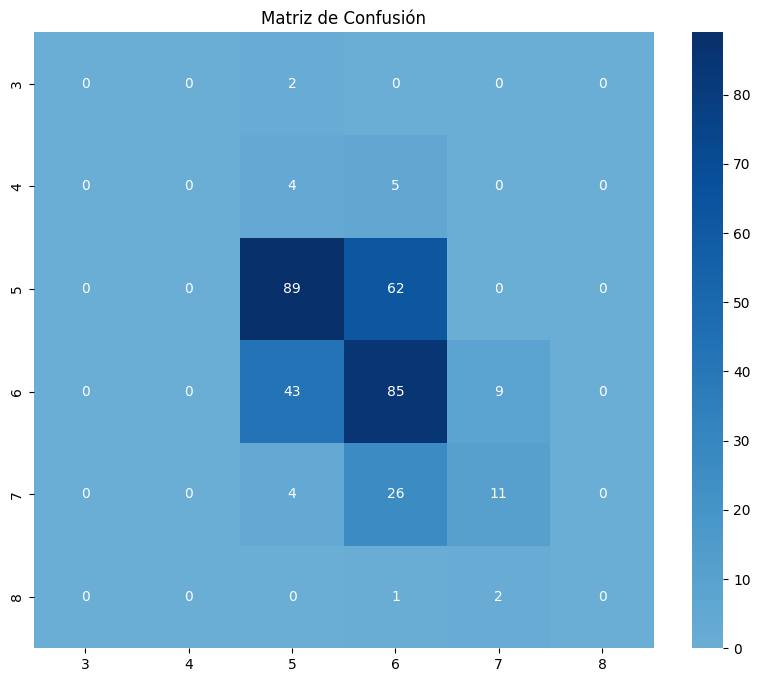

In [41]:
from classification_utils import graficar_matriz_confusion

graficar_matriz_confusion(conf_matrix_knn, labels=["3", "4", "5", "6", "7", "8"])

#### Random Forests

In [42]:
# Realizar predicciones
y_pred_rf = rf_params_cv.predict(X_test)

# Evaluar el modelo
accuracy_rf_cv = accuracy_score(y_test, y_pred_rf)

print(f'Exactitud:accuracy_rf_cv {accuracy_rf_cv}')
classification_report_rf_cv = classification_report(y_test, y_pred_rf)
print('Informe de Clasificación:')
print(classification_report_rf_cv)

# Matriz de Confusión
conf_matrix_rf_cv = confusion_matrix(y_test, y_pred_rf)
print('Matriz de Confusión Random Forests:')
print(conf_matrix_rf_cv)

Exactitud:accuracy_rf_cv 0.6588921282798834
Informe de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         9
           5       0.74      0.72      0.73       151
           6       0.60      0.71      0.65       137
           7       0.64      0.51      0.57        41
           8       0.00      0.00      0.00         3

    accuracy                           0.66       343
   macro avg       0.33      0.32      0.32       343
weighted avg       0.64      0.66      0.65       343

Matriz de Confusión Random Forests:
[[  0   0   1   1   0   0]
 [  0   0   6   3   0   0]
 [  0   0 108  43   0   0]
 [  0   0  30  97   9   1]
 [  0   0   1  19  21   0]
 [  0   0   0   0   3   0]]


/home/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

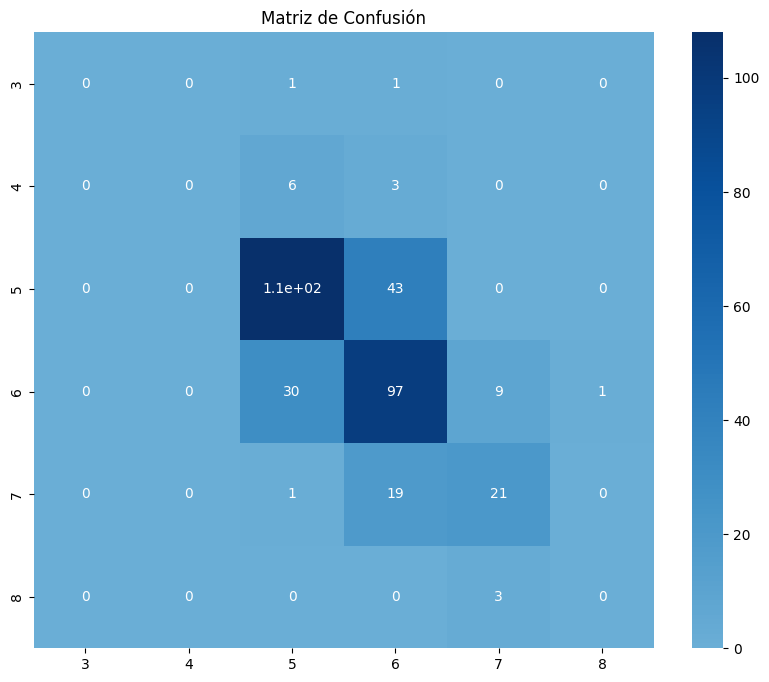

In [43]:
graficar_matriz_confusion(conf_matrix_rf_cv, labels=["3", "4", "5", "6", "7", "8"])

#### Regresión Logística

In [44]:
# Realizar predicciones
y_pred_lr = lr.predict(X_test)

# Evaluar el modelo
accuracy_lr_cv = accuracy_score(y_test, y_pred_lr)

print(f'Exactitud:accuracy_lr_cv {accuracy_lr_cv}')
classification_report_lr_cv = classification_report(y_test, y_pred_lr)
print('Informe de Clasificación:')
print(classification_report_lr_cv)

# Matriz de Confusión
conf_matrix_lr_cv = confusion_matrix(y_test, y_pred_lr)
print('Matriz de Confusión Logistic Regression:')
print(conf_matrix_lr_cv)

Exactitud:accuracy_lr_cv 0.641399416909621
Informe de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         9
           5       0.74      0.76      0.75       151
           6       0.57      0.68      0.62       137
           7       0.50      0.29      0.37        41
           8       0.00      0.00      0.00         3

    accuracy                           0.64       343
   macro avg       0.30      0.29      0.29       343
weighted avg       0.61      0.64      0.62       343

Matriz de Confusión Logistic Regression:
[[  0   1   1   0   0   0]
 [  0   0   4   5   0   0]
 [  0   0 115  36   0   0]
 [  0   0  33  93  11   0]
 [  0   0   2  27  12   0]
 [  0   0   0   2   1   0]]


/home/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

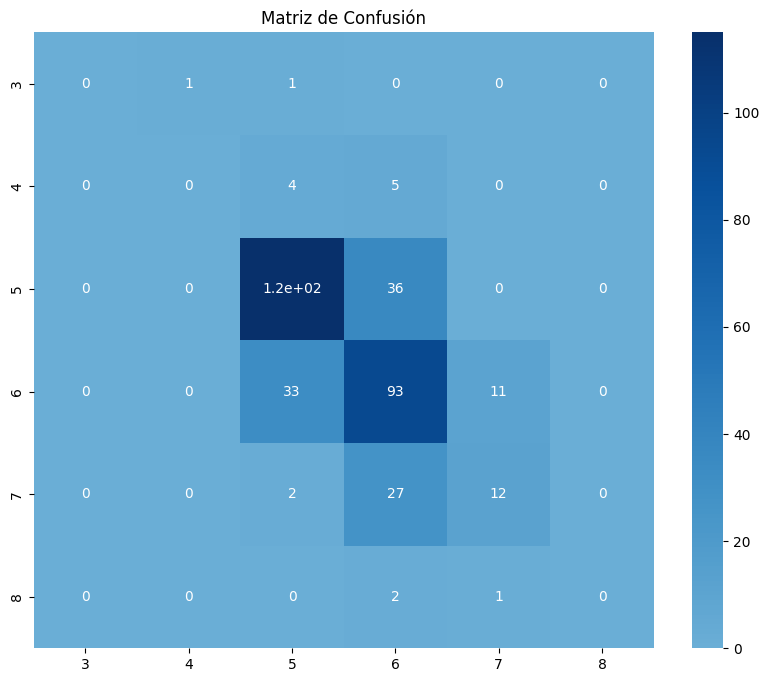

In [39]:
graficar_matriz_confusion(conf_matrix_lr_cv, labels=["3", "4", "5", "6", "7", "8"])

De los tres modelos generados, el mejor es Random Forests, ya que si bien tiene un accuracy menor, se puede notar en las precissions, recall, y f2 para todas las clasificaciones, en general son mejores.

### Crear y visualizar la curva ROC y calcular el AUC para el mejor modelo.

Como el modelo no es binario, se usa la técnica de "One-vs-Rest" (uno contra el resto). Esto implica calcular una curva ROC y AUC para cada clase en comparación con todas las demás.

In [60]:
y_test[2:3]

934    6
Name: quality, dtype: int64

In [62]:
y_pred_knn[0:1]

array([5])

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer


fpr = dict()
tpr = dict()
roc_auc = dict()

binarizer = LabelBinarizer()

y_test_binarized = binarizer.fit_transform(y_test)
y_pred_knn_binarized = binarizer.transform(y_pred_knn)

classes = binarizer.classes_
n_classes = len(classes)

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_knn_binarized.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_knn_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.72
Macro-averaged One-vs-Rest ROC AUC score:
0.56


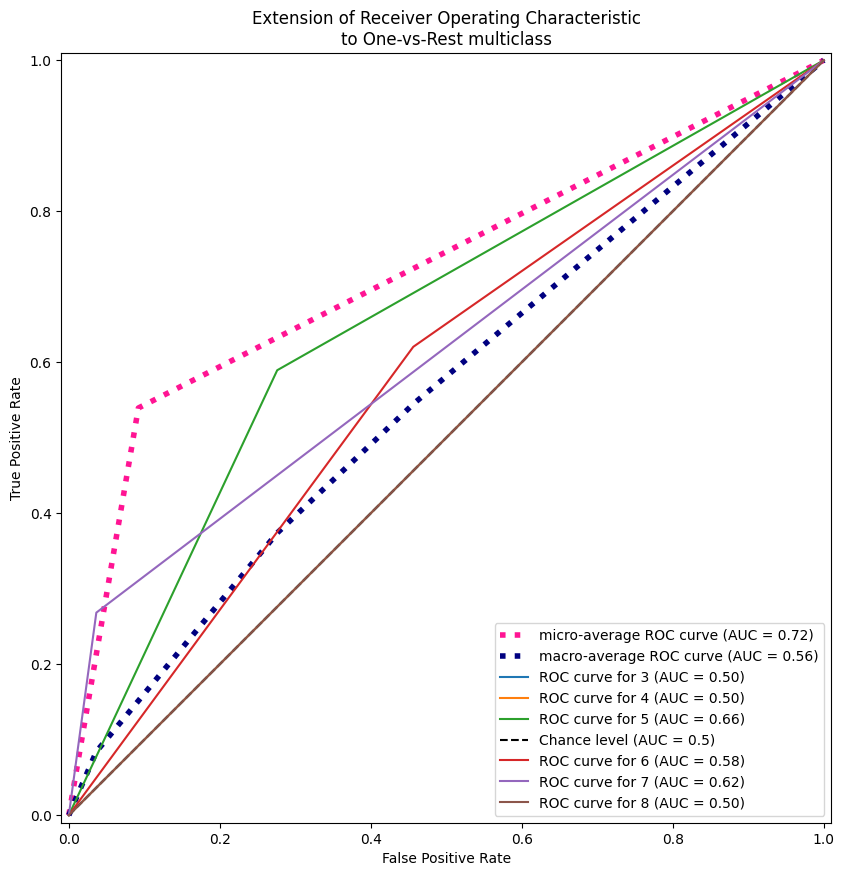

In [76]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

for class_id in range(0, n_classes):
    RocCurveDisplay.from_predictions(
        y_test_binarized[:, class_id],
        y_pred_knn_binarized[:, class_id],
        name=f"ROC curve for {classes[class_id]}",
        ax=ax,
        plot_chance_level=(class_id == 2),
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)

## 5. Análisis y Comparación de Resultados:

### Comparar el rendimiento de los diferentes modelos.

Como se mencionó previamente, el mejor modelo de todos para esta clasificación es el de Random Forests.

### Discutir cuál modelo ofrece el mejor rendimiento y por qué.

El modelo que ofrece mejor rendimiento es Random Forests, ya que posee las mejores precisiones, recalls, f1_score para las calificaciones.

### Identificar las fortalezas y debilidades de cada enfoque en este contexto.

La mayor fortaleza del enfoque de Random Forests es que posee un mejor rendimiento, pero a su vez, es mas lento el entrenamiento.

Las fortalezas de los enfoques KNN y LogisticRegression son que la velocidad de entrenamiento es mas rápida, pero a su vez poseen peor rendimiento, siendo el enfoque con KNN el que peor performance ofrece, incluso despues de usar la validación cruzada para encontrar el mejor parámetro K.